In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import sklearn
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

Graph with 32 nodes and 89 edges


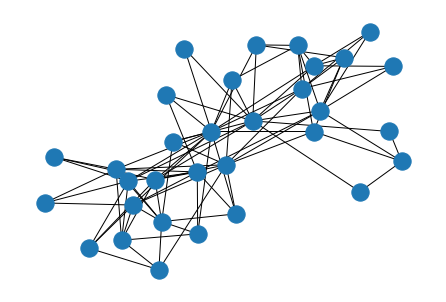

In [2]:
g1 = nx.davis_southern_women_graph()
print(g1)
nx.draw(g1)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1



/var/folders/y1/wt0h1yhn5hxd3qg29h4rkdgm0000gn/T/ipykernel_76494/558584923.py:5: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(bipartite.biadjacency_matrix(g1, w, c))


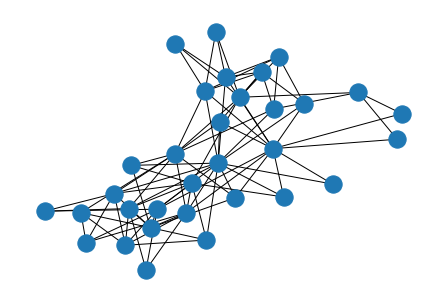

In [3]:
#seperate 
w = g1.graph["top"]
c = g1.graph["bottom"]

print(bipartite.biadjacency_matrix(g1, w, c))

# project bipartite graph onto women nodes and the clubs
W = bipartite.projected_graph(g1, w)
C = bipartite.projected_graph(g1, c)
print()


pos = nx.spring_layout(g1, seed=300)
nx.draw(g1, pos)
plt.show()

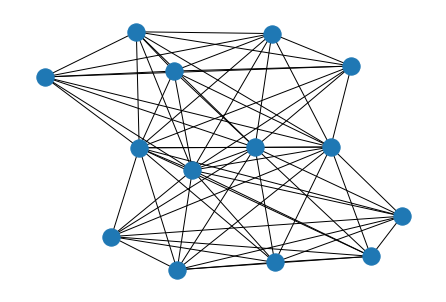

In [4]:
#Plot of the women that have been to the same events.
nx.draw(C)

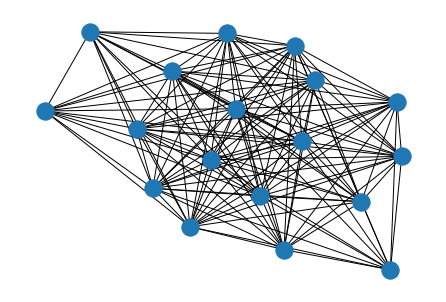

In [5]:
#Plot of events with one or more guests were present
nx.draw(W)

In [6]:
#number of people that won't be able to park
NC = len(w) - len(c)
print(NC)

4


{'Sylvia Avondale': 'E14', 'Frances Anderson': 'E3', 'Flora Price': 'E9', 'Pearl Oglethorpe': 'E6', 'Laura Mandeville': 'E1', 'Charlotte McDowd': 'E4', 'Evelyn Jefferson': 'E2', 'Katherina Rogers': 'E8', 'Nora Fayette': 'E10', 'Dorothy Murchison': 'source', 'Theresa Anderson': 'E5', 'Verne Sanderson': 'E12', 'Ruth DeSand': 'E7', 'Helen Lloyd': 'E11', 'end': 'E13', 'E3': 'Frances Anderson', 'E6': 'Pearl Oglethorpe', 'source': 'Dorothy Murchison', 'E9': 'Flora Price', 'E7': 'Ruth DeSand', 'E5': 'Theresa Anderson', 'E12': 'Verne Sanderson', 'E2': 'Evelyn Jefferson', 'E1': 'Laura Mandeville', 'E14': 'Sylvia Avondale', 'E4': 'Charlotte McDowd', 'E10': 'Nora Fayette', 'E13': 'end', 'E11': 'Helen Lloyd', 'E8': 'Katherina Rogers'}


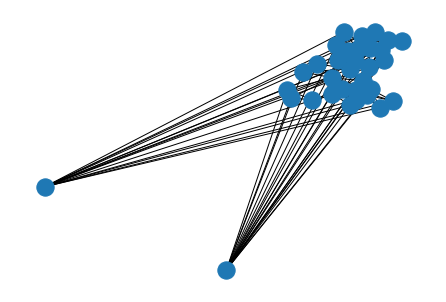

In [7]:
#make source and end nodes
s = "source"
t = "end"
g1.add_node(s)
g1.add_node(t)

#create edges connected source and end nodes
for i in w:
    g1.add_edge(s,i,weight = 0)
    
for i in c:
    g1.add_edge(t,i, weight = 0)

#make graph into directed nodes
g1d = g1.to_directed()

#Maxmiumbipartitegraph
MM = nx.bipartite.maximum_matching(g1d)
#draw Directed Graph
nx.draw(g1)
print(MM)

{'Evelyn Jefferson': {'E8': 0, 'E9': 0, 'E1': 0, 'E2': 0, 'E3': 0, 'E4': 0, 'E5': 0, 'E6': 0, 'source': 0}, 'Laura Mandeville': {'E1': 0, 'E3': 0, 'E7': 0, 'E8': 0, 'E2': 0, 'E5': 0, 'E6': 0, 'source': 0}, 'Theresa Anderson': {'E2': 0, 'E3': 0, 'E6': 0, 'E7': 0, 'E9': 0, 'E4': 0, 'E5': 0, 'E8': 0, 'source': 0}, 'Brenda Rogers': {'E5': 0, 'E7': 0, 'E8': 0, 'E1': 0, 'E3': 0, 'E4': 0, 'E6': 0, 'source': 0}, 'Charlotte McDowd': {'E3': 0, 'E4': 0, 'E5': 0, 'E7': 0, 'source': 0}, 'Frances Anderson': {'E3': 0, 'E8': 0, 'E5': 0, 'E6': 0, 'source': 0}, 'Eleanor Nye': {'E5': 0, 'E7': 0, 'E6': 0, 'E8': 0, 'source': 0}, 'Pearl Oglethorpe': {'E8': 0, 'E6': 0, 'E9': 0, 'source': 0}, 'Ruth DeSand': {'E5': 0, 'E9': 0, 'E7': 0, 'E8': 0, 'source': 0}, 'Verne Sanderson': {'E7': 0, 'E8': 0, 'E9': 0, 'E12': 0, 'source': 0}, 'Myra Liddel': {'E9': 0, 'E12': 0, 'E8': 0, 'E10': 0, 'source': 0}, 'Katherina Rogers': {'E12': 0, 'E13': 0, 'E8': 0, 'E9': 0, 'E10': 0, 'E14': 0, 'source': 0}, 'Sylvia Avondale': {'E8'

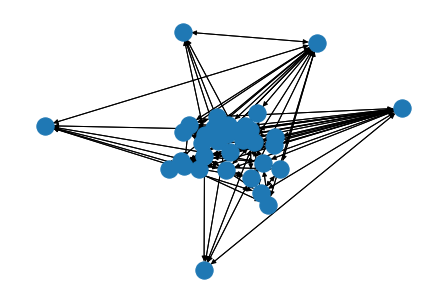

In [8]:
import random

g2 = nx.davis_southern_women_graph()

#seperate 
w = g1.graph["top"]
c = g1.graph["bottom"]

for (u, v) in g2.edges():
    g2.edges[u,v]['weight'] = random.randint(0,1)
#make source and end nodes
s = "source"
t = "end"
g2.add_node(s)
g2.add_node(t)

#create edges connected source and end nodes
for i in w:
    g2.add_edge(s,i,weight = 0)
    
for i in c:
    g2.add_edge(t,i, weight = 0)
    
#make graph into directed nodes
g2d = g2.to_directed()

#Maxmiumbipartitegraph
MC = nx.max_flow_min_cost(g2d,s,t,capacity= "weight")
#draw Directed Graph
nx.draw(g2d)
print(MC)

In [9]:
#Question 2
g3 = nx.davis_southern_women_graph()
w = g3.graph["top"]
c = g3.graph["bottom"]


# project bipartite graph onto women nodes
W = bipartite.projected_graph(g3, w)
C = bipartite.projected_graph(g3, c)


print()
print("#Friends, Member")
#Find degrees for women and the events and print
for i in w:
    print(f"{W.degree(i)} {i}")
    
print("#Attendees, Event")
for i in c:
    print(f"{C.degree(i)} {i}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price
#Attendees, Event
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


In [10]:
#eigenvectors and betweenness centrality for the graph
cen = nx.eigenvector_centrality(g3)
print(cen)
btw = nx.betweenness_centrality(g3)
print(btw)

{'Evelyn Jefferson': 0.23669199956593817, 'Laura Mandeville': 0.21865425850665976, 'Theresa Anderson': 0.262027292675683, 'Brenda Rogers': 0.22132997761985013, 'Charlotte McDowd': 0.11894468975911866, 'Frances Anderson': 0.14776178887216462, 'Eleanor Nye': 0.16146463160228736, 'Pearl Oglethorpe': 0.12729996701762156, 'Ruth DeSand': 0.1669052290864312, 'Verne Sanderson': 0.15443075747425528, 'Myra Liddel': 0.13208020380055685, 'Katherina Rogers': 0.15576908782477517, 'Sylvia Avondale': 0.19599165124742376, 'Nora Fayette': 0.18660813789991867, 'Helen Lloyd': 0.14189261798243372, 'Dorothy Murchison': 0.09293861503197146, 'Olivia Carleton': 0.04919374969881626, 'Flora Price': 0.04919374969881626, 'E1': 0.1003691529427341, 'E2': 0.10640565406401606, 'E3': 0.17879448898670355, 'E4': 0.12444520652004003, 'E5': 0.227500512695069, 'E6': 0.2316623040078495, 'E7': 0.2711782244726617, 'E8': 0.35824435911378705, 'E9': 0.2683424242623056, 'E10': 0.12049201761650306, 'E11': 0.06331895428788441, 'E12'

You can notice that some events and people compared to similar nodes have larger eigenvectors which would signify that they are playing a larger role in the outcome of the systems properties.

For betweeness, we see a similar pattern of some nodes having a smaller values. This would tell us that these nodes node comes in the shortest chosen path between two other nodes more often then the larger values.

Largest eigenvalue: 1.9999999999999996
Smallest eigenvalue: 1.6653345369377348e-16


<class 'networkx.utils.decorators.argmap'> compilation 36:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


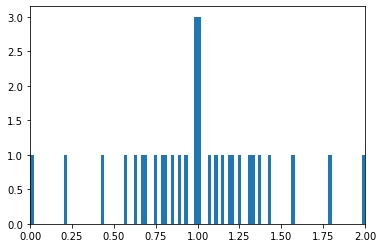

In [11]:
import numpy.linalg

L = nx.normalized_laplacian_matrix(g3)
e = numpy.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)
plt.xlim(0, 2)
plt.show()

values :  dict_values([0.23669199956593817, 0.21865425850665976, 0.262027292675683, 0.22132997761985013, 0.11894468975911866, 0.14776178887216462, 0.16146463160228736, 0.12729996701762156, 0.1669052290864312, 0.15443075747425528, 0.13208020380055685, 0.15576908782477517, 0.19599165124742376, 0.18660813789991867, 0.14189261798243372, 0.09293861503197146, 0.04919374969881626, 0.04919374969881626, 0.1003691529427341, 0.10640565406401606, 0.17879448898670355, 0.12444520652004003, 0.227500512695069, 0.2316623040078495, 0.2711782244726617, 0.35824435911378705, 0.2683424242623056, 0.12049201761650306, 0.06331895428788441, 0.14339822990089227, 0.07985451587221752, 0.07985451587221752])


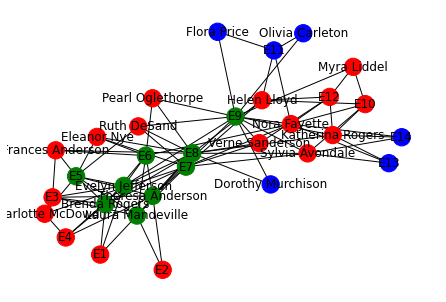

In [64]:
#spectral graph based on eigenvalue centrality

color_map = []

people = cen.keys()
values = cen.values()
 
# printing keys and values separately
print("values : ", str(values))

for v1 in values:
    if v1 < .1:
        color_map.append('blue')
    elif .1 < v1 < .2:
        color_map.append('red')
    else: 
        color_map.append('green')    

nx.draw(g3, node_color=color_map, with_labels=True)

plt.show()

values :  dict_values([0.09243053952845212, 0.04914868366576943, 0.08382717212549207, 0.04735814390994237, 0.010140350205990675, 0.010253510918225078, 0.009037924491193493, 0.006507836308894933, 0.01606125402625199, 0.015060776907855697, 0.01564136563963574, 0.0453256463296124, 0.06862488078028632, 0.10858130346049079, 0.0405644200615806, 0.0018695041988760154, 0.00483710716158534, 0.00483710716158534, 0.00209408273924403, 0.0020303032187582275, 0.017714891753424267, 0.007486726470019202, 0.03664061940065164, 0.06319868906402719, 0.1258812653738273, 0.23700300426238308, 0.21920891071174742, 0.011122410270192064, 0.01911560576755823, 0.017588323198345388, 0.00217801399243785, 0.00217801399243785])


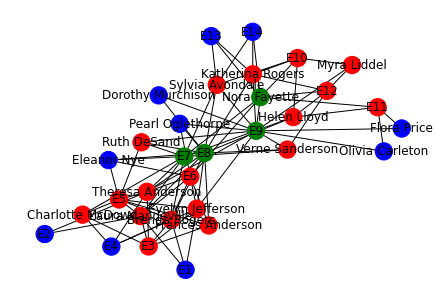

In [69]:
#spectral graph based on betweenness centrality

color_map = []

people = btw.keys()
values = btw.values()
 
# printing keys and values separately
print("values : ", str(values))

for v1 in values:
    if v1 < .01:
        color_map.append('blue')
    elif .01 < v1 < .1:
        color_map.append('red')
    else: 
        color_map.append('green')    

nx.draw(g3, node_color=color_map, with_labels=True)

plt.show()

I think there are a couple observations that we can take away from the cluster graphs. First it looks that we have 3 groups that have formed when using K-Means. With the group of 3, this represents the value with a very low betweeness and eigenvalue centrality. These nodes then can be inferred to have very little influence on the system. As the other groups are a very similar size and clustered together they have similar avergaes when it comes to eigenvalue and betweenness centrality. This allows us to make the inference that they have a similar influence on the system.